# Защита персональных данных клиентов

## Описание задачи

- Защитить данные клиентов страховой компании «Хоть потоп»
- Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию
- Обосновать корректность его работы
- При преобразовании качество моделей машинного обучения не должно ухудштся
- Подбирать наилучшую модель не требуется

- Ответить на вопрос и обосновать решение.
    - Умножте обучающие признаки на обратимую матрицу
        - Изменится ли качество линейной регрессии? (Её можно обучить заново)
        - Если изменится. Приведите примеры матриц.
        - Если **не** изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
- Предложить алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.
- Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из *sklearn* не отличается до и после преобразования. Примените метрику *R2*.

## Описание данных

Данные о клиентах страховой компании

**Обучающие признаки:**
- пол
- возраст
- зарплата
- количество членов семьи

**Целевой признак:**
- количество страховых выплат клиенту за последние 5 лет

## Подключение библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from IPython.display import display, Markdown, Latex
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
# Отключение предупреждений UserWarning
warnings.simplefilter('ignore', category=UserWarning)

# Устраняет ошибку numpy при которой маленькие числа не отображаются как нули
np.set_printoptions(precision=9, suppress=True)

# Константы
RANDOM_STATE=12345

In [3]:
def print_pmatrix(a):
    """Отображает матрицу из LaTeX"""
    if len(a.shape) > 2:
        raise ValueError('pmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{pmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{pmatrix}']
    return Latex('\n'.join(rv))

## Получение данных

In [5]:
df = pd.read_csv('/datasets/insurance.csv')

## Изучение данных

In [6]:
df

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [8]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


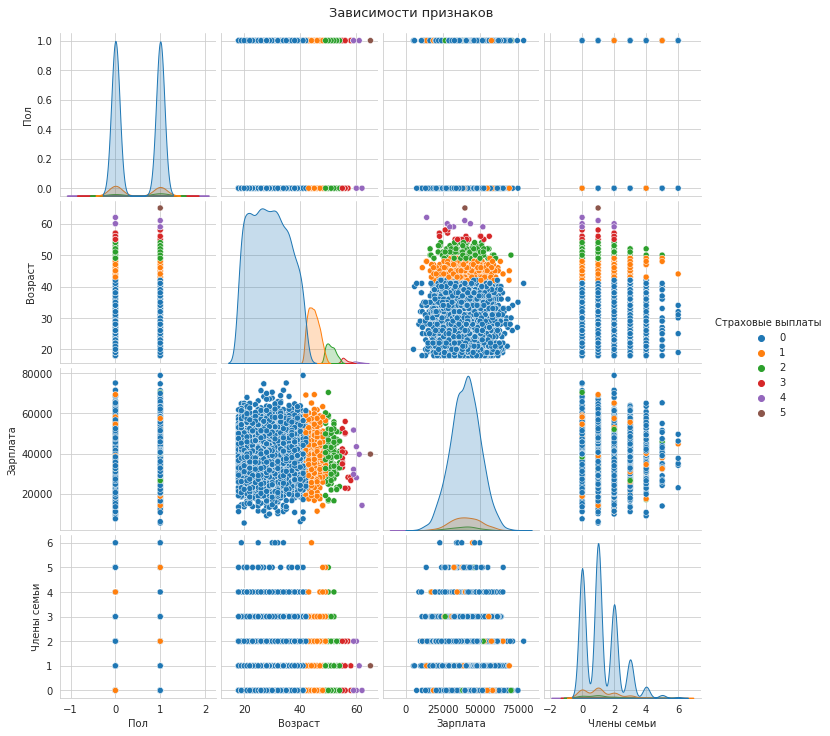

In [9]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='Страховые выплаты', palette=sns.color_palette('tab10', n_colors=len(df['Страховые выплаты'].unique())));
plt.suptitle("Зависимости признаков", y=1.02, fontsize=13)
plt.show()

**Вывод**
- Доля клиентов без выплат больше всего
- Возраст клиентов без выплат в основном люди до 40 лет

## Умножение матриц

**Ответ:** Параметры линейной регрессии в исходной задаче и в преобразованной связаны матричным умножением обучающих признаков на обратимую матрицу, а качество линейной регрессии не изменится.

**Обоснование:**

Свойства матричных операций

$A(BC) = (AB)C$ — Ассоциативность
$(AB)^{-1} = B^{-1} A^{-1}$ — Обращение произведения матриц равно произведению обратных матриц в обратном порядке  
$(AB)^T = B^T A^T$ — Транспонированное произведение матриц равно произведению транспонированных матриц в обратном порядке  
$A E = E A = A$ — Умножение матрицы на единичную матрицу, получаем исходную  
$A A^{-1} = A^{-1} A = E$ — Умножение матрицы на свою обратную, получаем единичную

Следовательно

$E = (A^T)^{-1} A^T$  
$E$ — единичная матрица

- Формула линейной регрессии $a = Xw + w_0$,
- Упрощённая запись формулы линейной регрессии $a = X_i w$,  где $X_i$ - новые строки признаков, $w = (X^T X)^{-1} X^T y$
- Параметр $w_0$ поднимает или опускает прямую. Он не менялся при изменённых признаках.
- Преобразованная задача $a' = XPw'$. Случайная матрица $P$, в которой число строк равно числу столбцов $X$ и $P$ — обратима, то есть из матрицы $P$ можно получить матрицу $P^{-1}$, при этом $PP^{-1} = E$
- Докажем что $a = a'$
- $Xw = XPw'$
- Подставим вместо $w$, формулу её вычисления: $a = X_i w = X_i (X^T X)^{-1} X^T y$


Если обучить нашу модель на новых (изменённых) признаках, то модель найдёт новые коэффициенты $w'$, то есть $X = XP$  
$w' = ((XP)^T XP)^{-1} (XP)^T y$  
  
$w' = (P^T (X^T X) P)^{-1} (XP)^T y$  
$w' = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y$  
$w' = P^{-1} (X^T X)^{-1} X^T y$  
$w' = P^{-1} w$


$a = Xw$    
$a' = XPw'$    
$Xw = XPw'$    
$Xw = XPP^{-1} w$    
$Xw = Xw$

Следовательно $a = a'$

То есть что бы из зашифрованных признаков получить исходные нужно домножить на обратную матрицу P

**Вывод**

Таким образом $a = a'$, следовательно результат предсказания не изменится не смотря на изменения признаков.

In [10]:
# Проверка на примере
X = np.random.normal(10, size=[8, 4])
P = np.random.normal(4, size=[4, 4])
I = np.linalg.inv(P)
X_s = X @ P @ I

display(print_pmatrix(X))
display(print_pmatrix(P))
display(print_pmatrix(I))
display(print_pmatrix(X_s))

# Сравнение матриц
np.allclose(X, X_s)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

True

## Алгоритм преобразования

**Алгоритм:**
- Есть матрица исходных признаков $X_{n \times m}$, где $n$ — количество строк, $m$ — количество столбцов
- Создаём случайную квадратную обратимую матрицу $P_{p \times q}$, где $p$ — количество строк, $q$ — количество столбцов, такие что $n = q$
- Производим умножение получаем новую изменённую матрицу признаков $M = XP$

**Обоснование:**
- Метрика R2 не изменилась при использовании изменённых данных по сравнению с исходными в модели линейной регрессии

## Предобработка признаков

In [11]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

In [12]:
train_features, test_features, train_target, test_target = \
    train_test_split(features,target, test_size=0.25, random_state=RANDOM_STATE)

## Проверка собственного алгоритма

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:  
$a = Xw$

Задача обучения:  
$w = \arg\min_w MSE(Xw, y)$

Формула обучения:  
$w = (X^T X)^{-1} X^T y$

**Задача:**
- Преобразовать признаки с помощью обратимой матрицы
- Определить изменится ли качество линейной регрессии
- Определить как связаны параметры линейной регрессии в исходной задаче и в преобразованной

In [13]:
class MyLinearRegression:
    def fit(self, train_features, train_target):
        ones = np.ones([train_features.shape[0], 1])
        X = np.concatenate([ones, train_features], axis=1)
        y = train_target

        w = np.linalg.inv(X.T @ X) @ X.T @ y
        
        self.w = w[1:]
        self.w0 = w[0]
        
        display(Latex('$w$'))
        display(print_pmatrix(self.w))
        
        display(Latex('$w_0$'))
        display(print_pmatrix(self.w0))
    
    def predict(self, test_features):
        return test_features @ self.w + self.w0

### Оригинальные данные

In [14]:
model_my_lr = MyLinearRegression()
model_my_lr.fit(train_features, train_target)
predict_my_lr = model_my_lr.predict(test_features)

r2_score_my_lr = r2_score(test_target, predict_my_lr)
r2_score_my_lr

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

0.4352275712702667

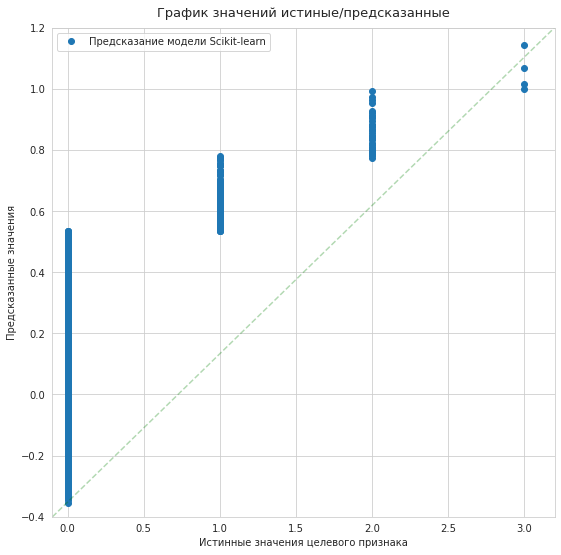

In [15]:
plt.figure(figsize=(9, 9))
plt.plot(test_target, predict_my_lr, 'o', alpha=1)
plt.legend(['Предсказание модели Scikit-learn'])
plt.plot([-0.1,3.2],[-0.4,1.2],linestyle='--',color='g',alpha=0.3)
plt.xlim(-0.1,3.2)
plt.ylim(-0.4,1.2)
plt.title('График значений истиные/предсказанные', y=1.01, fontsize=13)
plt.grid(True)
plt.xlabel('Истинные значения целевого признака')
plt.ylabel('Предсказанные значения')
plt.show()

### Изменённые данные

In [16]:
# Матрица на которую умножаются признаки
P = np.random.normal(5, size=[4, 4])
print_pmatrix(P)

<IPython.core.display.Latex object>

In [17]:
print_pmatrix(np.linalg.inv(P))

<IPython.core.display.Latex object>

Матрица $P$ обратима.

In [18]:
# Тренировочная выборка
train_features_P = train_features @ P
train_features_P.columns = train_features.columns
train_features_P.head()

,Пол,Возраст,Зарплата,Члены семьи
3369,168908.946503,195168.144881,188910.817350,195979.651552
1441,268608.063537,310387.261218,300430.296993,311599.149654
571,191697.223785,221507.010700,214405.575669,222390.976499
225,210357.172570,243068.389417,235275.602710,244040.264803
2558,235983.363949,272681.718120,263940.506580,273756.519520


In [19]:
# Тестовая выборка
test_features_P = test_features @ P
test_features_P.columns = test_features.columns
test_features_P.head()

,Пол,Возраст,Зарплата,Члены семьи
3183,181926.764321,210209.975169,203477.110958,211058.553514
1071,201098.524388,232359.833731,224914.101362,233325.155883
2640,196386.581196,226925.362135,219646.711899,227842.915214
2282,162279.597154,187520.142987,181505.869825,188251.519735
1595,186621.055635,215630.520050,208724.587857,216516.890429


Признаки зашифрованы.

Используем зашифрованные признаки для модели

In [20]:
model_my_lr_P = MyLinearRegression()
model_my_lr_P.fit(train_features_P, train_target)
predict_my_lr_P = model_my_lr_P.predict(test_features_P)

r2_score_my_lr_P = r2_score(test_target, predict_my_lr_P)
r2_score_my_lr_P

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

0.4352270524400986

In [21]:
r2_score_my_lr

0.4352275712702667

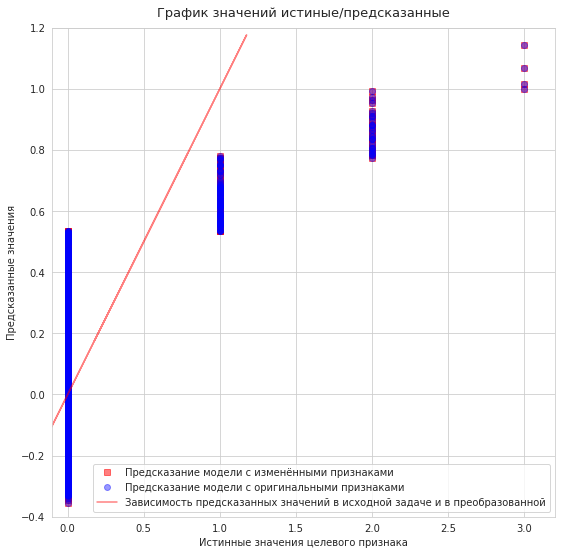

In [22]:
plt.figure(figsize=(9,9))
plt.plot(test_target,predict_my_lr_P,'rs',alpha=0.5)
plt.plot(test_target,predict_my_lr,'bo',alpha=0.4)

plt.plot(predict_my_lr_P,predict_my_lr,'r',alpha=0.5)
plt.legend(['Предсказание модели c изменёнными признаками', 'Предсказание модели c оригинальными признаками', 'Зависимость предсказанных значений в исходной задаче и в преобразованной'])

plt.xlim(-0.1,3.2)
plt.ylim(-0.4,1.2)
plt.title('График значений истиные/предсказанные', y=1.01, fontsize=13)
plt.grid(True)
plt.xlabel('Истинные значения целевого признака')
plt.ylabel('Предсказанные значения')
plt.show()

In [23]:
print(f'Значение R2 для собственной модели не изменилось, для исходных данных — {r2_score_my_lr:.3}, по сравнению с преобразованными — {r2_score_my_lr_P:.3}')

Значение R2 для собственной модели не изменилось, для исходных данных — 0.435, по сравнению с преобразованными — 0.435


## Проверка алгоритма sklearn

### Оригинальные данные

In [24]:
model_lr = LinearRegression()
model_lr.fit(train_features, train_target)
predict_lr = model_lr.predict(test_features)

r2_score_lr = r2_score(test_target, predict_lr)
r2_score_lr

0.43522757127026546

### Изменённые данные

In [25]:
model_lr_P = LinearRegression()
model_lr_P.fit(train_features_P, train_target)
predict_lr_P = model_lr_P.predict(test_features_P)

r2_score_lr_P = r2_score(test_target, predict_lr_P)
r2_score_lr_P

0.43522757127088707

In [26]:
print(f'Значение R2 для модели sklearn не изменилось, для исходных данных — {r2_score_lr:.3}, по сравнению с преобразованными — {r2_score_lr_P:.3}')

Значение R2 для модели sklearn не изменилось, для исходных данных — 0.435, по сравнению с преобразованными — 0.435


## Вывод

Была поставлена задача защитить данные клиентов страховой компании, разработав такой метод преобразования исходных данных, что бы их было трудно восстановить. А качество модели линейной регрессии при этом не изменялось.

В результате разработаны собственная модель линейной регрессии и алгоритм в котором исходные признаки умножаются на случайную обратимую квадратную матрицу и при этом метрика $R2$ не изменилась. Написано его обоснование.

Зависимость предсказанных значений в исходной задаче и в преобразованной линейна.

С помощью метрики $R2$ сделано сравнение собственной модели линейной регрессии и из пакета sklearn, модели не отличаются.